In [7]:
import tensorflow as tf
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [8]:
# Code used from view.ipynb provided
import matplotlib.pyplot as plt

def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

def show_mnist_examples(x, y):
    fig = plt.figure(constrained_layout=True,figsize=(12,9), dpi=100)
    gs = fig.add_gridspec(3,4)
    main_ax = fig.add_subplot(gs[:3,:3])
    fig.suptitle(y)
    main_ax.imshow(image_normalization(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)

    for j in range(3):
      c_ax = fig.add_subplot(gs[j,-1])
      subimage = x.copy()
      subimage[:j] = 0
      subimage[j+1:] = 0
      subimage[j] = subimage[j]-subimage[j].min()
      c_ax.imshow(image_normalization(np.moveaxis(subimage, 0, -1)))
      disable_ax_ticks(c_ax)
    plt.show()

In [9]:
# Reshaping the dataset to the correct dimension for the model
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

train_x = image_normalization(train_x)
test_x = image_normalization(test_x)

In [10]:
from tensorflow.keras import layers, models

# Creating the model
model = models.Sequential([
  layers.Conv2D(filters=28, kernel_size=(3, 3), input_shape=train_x[0].shape),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               605824    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [11]:
# Compile, fit and evaluate model
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

model_output = model.fit(x=train_x, y=train_y, epochs=10)
model.evaluate(test_x, test_y)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2070 - accuracy: 0.9363
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0839 - accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0615 - accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0450 - accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0361 - accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0308 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0245 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0218 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0196 - accuracy: 0.9933
Epoch 10/10
313/313 [==============================] - 2s 7ms/st

[0.06310522556304932, 0.9854999780654907]

In [12]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np

# Import dataset for testing; using train_x which is the largest dataset available
path = "/content/drive/MyDrive/ColabNotebooks/MachineLearningCoursework/" # Change path to run program
addnist_test_x = np.load(path + "train_x.npy", allow_pickle=True)
addnist_test_y = np.load(path + "train_y.npy", allow_pickle=True)

Mounted at /content/drive


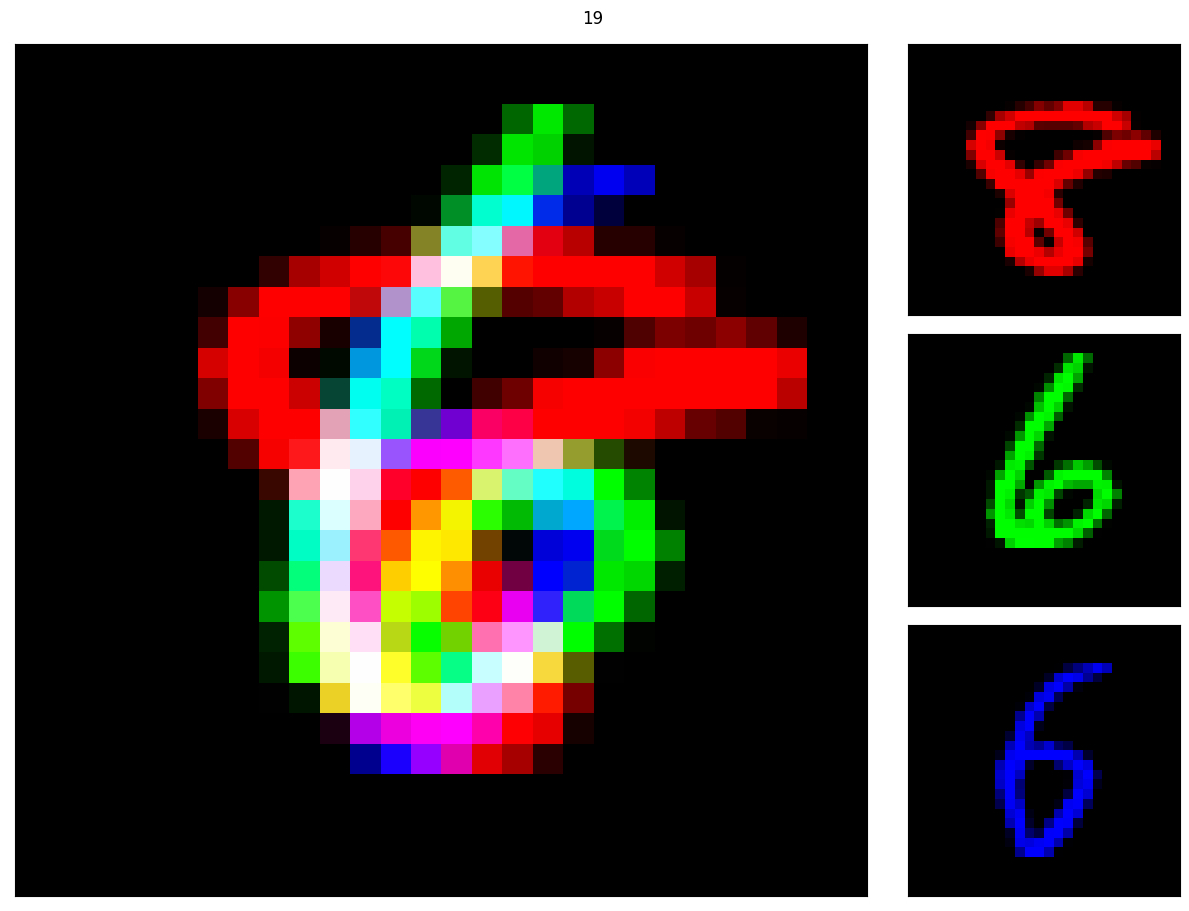

In [13]:
import random

# Display random image from testing dataset
ri = random.randrange(addnist_test_x.shape[0])
show_mnist_examples(addnist_test_x[ri], addnist_test_y[ri])

In [14]:
# Resizing the dataset to be the correct shape for the model
addnist_test_x.resize(addnist_test_x.shape[0]*3, 28, 28)
addnist_test_x = image_normalization(addnist_test_x)

# Make predictions using model
predictions = model.predict(addnist_test_x)
combined_predictions = np.zeros(addnist_test_y.shape[0])

# Iterate through predictions and combine 3 at a time and minus 1 from the total
# to find the predicted value for each group of 3 images
i = 0
j = 0
while i in range(len(predictions)):
  total = np.argmax(predictions[i]) + np.argmax(predictions[i+1]) + np.argmax(predictions[i+2]) - 1
  combined_predictions[j] = total
  i += 3
  j += 1

# Check if each of the combined predictions was correct
k = 0
count = 0
while k in range(len(combined_predictions)):
  if combined_predictions[k] == addnist_test_y[k]:
    count += 1
  k += 1

# Calculate and display the accuracy
accuracy = (count/len(combined_predictions))*100
print("This model has an accuracy of: " + "{:.2f}".format(accuracy) + "%")

4219/4219 [==============================] - 30s 7ms/step
This model has an accuracy of: 99.75%


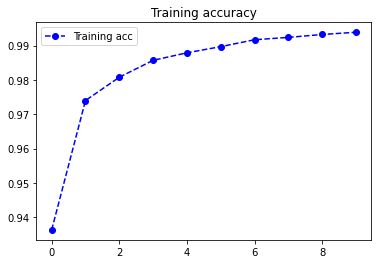

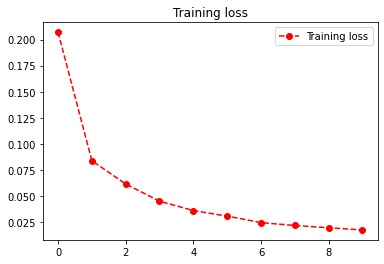

In [15]:
import matplotlib.pyplot as plt

acc = model_output.history['accuracy']
loss = model_output.history['loss']

epochs = range(len(acc))

# Displays a plot of the training accuracy over each epoch
plt.plot(epochs, acc, 'bo--', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

# Displays a plot of the training loss over each epoch
plt.plot(epochs, loss, 'ro--', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()